# Online Shoppers Purchasing Intention Dataset Analysis

Zuxuan Huai

Brown University, Data Science Initiative

Github Repo: https://github.com/wendyhuai/Online-Shoppers-Analysis

## Introduction

Over the last few years, e-commerce has become an indispensable part of the global retail framework. As more people choose to shop online, how and why, when and what makes a customer click on the “purchase” button is the question that many online retailers seek to answer. This project analyzes the online shoppers purchasing intention dataset from UCI Machine Learning Repository and investigates what factors will classify a website visit as a visit with purchase made or without.

This dataset contains 12330 rows and 18 columns. The target variable is the last column of the dataset, which is the revenue column with Boolean values true or false. A true means the user made a purchase in this visit, and a false means the user did not make a purchase. The goal of project is to classify whether a user made a purchase or not given his/her information.

The predictor variables are the first 17 columns (10 numerical and 7 categorical). 
- Administrative, Informational, ProductRelated: the number of different types of pages visited by the visitor in that session
- Administrative_Duration, Informational_Duration, ProductRelated_Duration: total time spent in each of these page categories
- BounceRates: the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- ExitRates: for all pageviews to the page, the percentage that were the last in the session
- PageValues: the average value for a web page that a user visited before completing an e-commerce transaction
- SpecialDay: numerical [0, 0.2, 0.4, 0.6, 0.8, 1] closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) 
- Month: 10 unique months, excluding Jan and Apr
- OperatingSystems: 8 categories
- Browser: 13 categories
- Region: 9 categories
- TrafficType: 20 categories
- VisitorType: indicates a user is a returning visitor, new visitor, or other
- Weekend: (Ture/False) whether the visit date is a weekend

A real-time online shopper behavior nalysis system has been built using this dataset. The researchers has successfully predicted the urchasing intention using clickstream and session information data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/online_shoppers_intention.csv")

## EDA

### Target Variable Analysis

The target variable has 10422 falses and 1908 trues. The bar plot below visualizes the breakdown of the target variable.

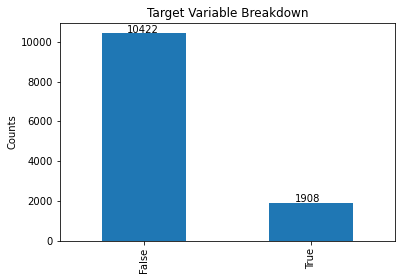

In [4]:
pd.value_counts(df['Revenue']).plot.bar()
val = pd.value_counts(df['Revenue'])
for i, v in enumerate(val):
    plt.text(i -0.1, v + 25, str(v))
plt.title("Target Variable Breakdown")
plt.ylabel('Counts')
plt.savefig('../figures/y_bar.png',dpi = 300)
plt.show()

### Predictor Variables - Numerical Variables

The first 6 columns include information about number of visits in a certain type of page and the total time spent on this type of page. The types include administrative, informational, and product related. It is worth noticing that the number of product-related page visits shows a positive correlation with the time spent on product-related pages. A scatter plot of these two variables are shown below. 

Text(0.5, 1.0, 'Administrative Page Info')

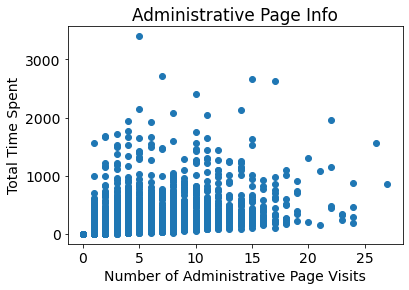

In [96]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.xlabel("Number of Administrative Page Visits")
plt.ylabel("Total Time Spent")
plt.savefig('../figures/admin_scatter',dpi = 300)
plt.title("Administrative Page Info")

Text(0.5, 1.0, 'Informational Page Info')

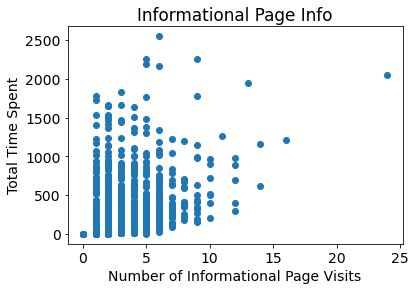

In [97]:
plt.scatter(df.iloc[:,2], df.iloc[:,3])
plt.xlabel("Number of Informational Page Visits")
plt.ylabel("Total Time Spent")
plt.savefig('../figures/Info_scatter.png',dpi = 300)
plt.title("Informational Page Info")

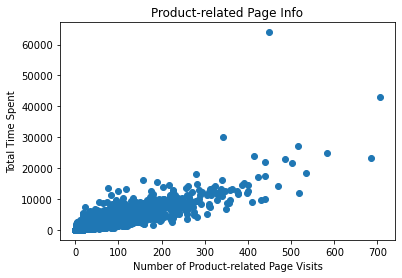

In [7]:
plt.scatter(df.iloc[:,4], df.iloc[:,5])
plt.xlabel("Number of Product-related Page Visits")
plt.ylabel("Total Time Spent")
plt.title("Product-related Page Info")
plt.savefig('../figures/prod_scatter.png',dpi = 300)
plt.show()

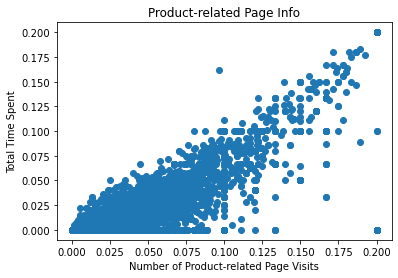

In [8]:
plt.scatter(df['ExitRates'], df['BounceRates'])
plt.xlabel("Number of Product-related Page Visits")
plt.ylabel("Total Time Spent")
plt.title("Product-related Page Info")
plt.savefig('../figures/erbr_scatter.png',dpi = 300)
plt.show()

The next 4 columns are numerical variables as well. After looking at the brief statistics of these columns below, I noticed that the majority of Page Values and Special Days are zero.

0.44752635847526356


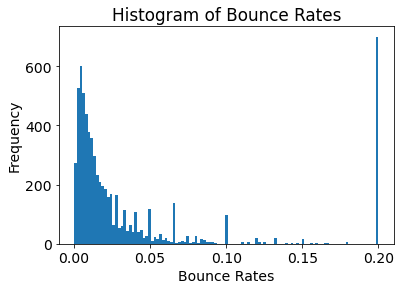

In [98]:
print(df[df['BounceRates']==0].shape[0]/df.shape[0])
df[df['BounceRates']>0]['BounceRates'].plot.hist(bins = int(np.sqrt(df.shape[0])))   
plt.title("Histogram of Bounce Rates")
plt.xlabel('Bounce Rates')
plt.savefig('../figures/BounceRate_hist.png',dpi = 300)
plt.show()

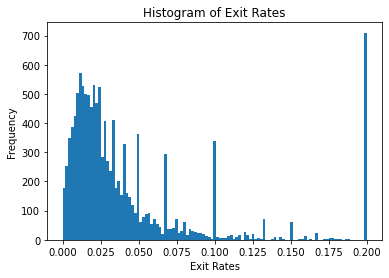

In [11]:
df['ExitRates'].plot.hist(bins = int(np.sqrt(df.shape[0])))   
plt.title("Histogram of Exit Rates")
plt.xlabel('Exit Rates')
plt.savefig('../figures/ExitRate_hist.png',dpi = 300)
plt.show()

Since 77.9% of Page Values are zero, a histogram excluding the zeros gives an overview of the distribution of the remaining data. 

0.7785888077858881


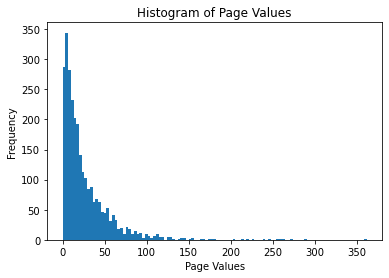

In [13]:
print(df[df['PageValues']==0].shape[0]/df.shape[0])
df[df['PageValues']>0]['PageValues'].plot.hist(bins = int(np.sqrt(df.shape[0])))   
plt.title("Histogram of Page Values")
plt.xlabel('Page Values')
plt.savefig('../figures/PageVal_hist.png',dpi = 300)
plt.show()

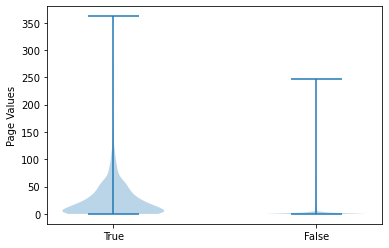

In [14]:
dataset = [df[df['Revenue']==True]['PageValues'].values,
           df[df['Revenue']==False]['PageValues'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['True','False'])
plt.ylabel('Page Values')
plt.savefig('../figures/pagevalue_vio.png',dpi = 300)
plt.show()

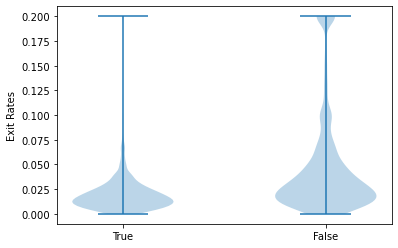

In [15]:
dataset = [df[df['Revenue']==True]['ExitRates'].values,
           df[df['Revenue']==False]['ExitRates'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['True','False'])
plt.ylabel('Exit Rates')
plt.savefig('../figures/exitrates_vio.png',dpi = 300)
plt.show()

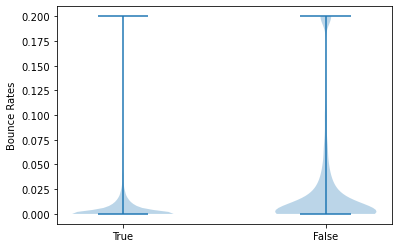

In [16]:
dataset = [df[df['Revenue']==True]['BounceRates'].values,
           df[df['Revenue']==False]['BounceRates'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['True','False'])
plt.ylabel('Bounce Rates')
plt.savefig('../figures/BounceRates_vio.png',dpi = 300)
plt.show()

Since The special day measures the closeness of the purchase date to a special date, I will treat this variable as ordinal variable in future analysis. The histogram below shows the fraction of users make purchases with the corresponding special date variable. It is interesting to see that fewer people make purchase at 0.4 and 0.8 compare to other special day numbers.

In [17]:
df['SpecialDay'].value_counts().sort_index()

0.0    11079
0.2      178
0.4      243
0.6      351
0.8      325
1.0      154
Name: SpecialDay, dtype: int64

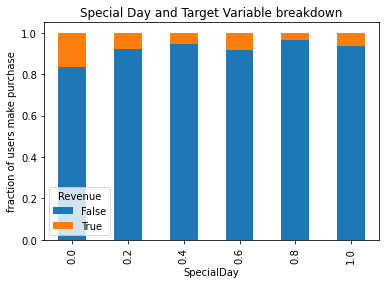

In [20]:
count_matrix = df.groupby(['SpecialDay', 'Revenue']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of users make purchase')
plt.title('Special Day and Target Variable breakdown')
plt.savefig('../figures/SD_bar.png',dpi = 300)
plt.show()

This figures shows the fraction of users make purchases with the corresponding special date variable.It is interesting to see that fewer people make purchaes at 0.4 and 0.8 compare to other special day numbers.

### Predictor Variables - Categorical Variables

There are many categorical variables in this dataset, here is the breakdown of month and purchases.

In [21]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

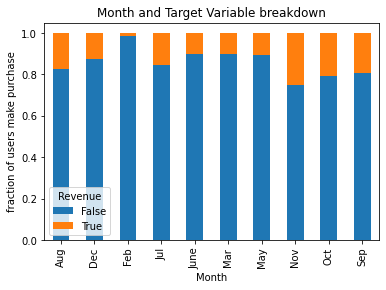

In [22]:
count_matrix = df.groupby(['Month', 'Revenue']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of users make purchase')
plt.title( 'Month and Target Variable breakdown')
plt.show()

This figure shows the fraction of purchases make in each month. January and April is not present in the dataset. A small fraction of users makes purchases in Feb and a relatively large proportion of users make purchases in their visits in November.

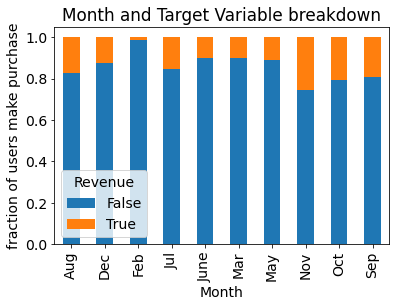

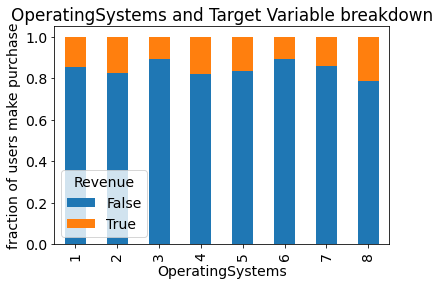

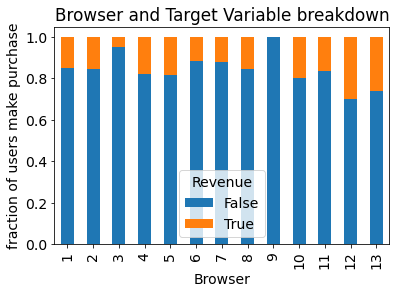

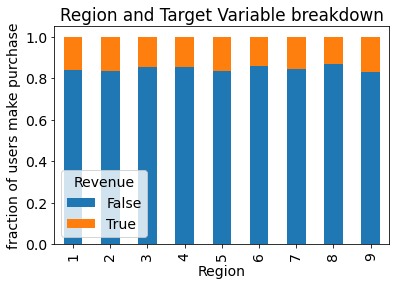

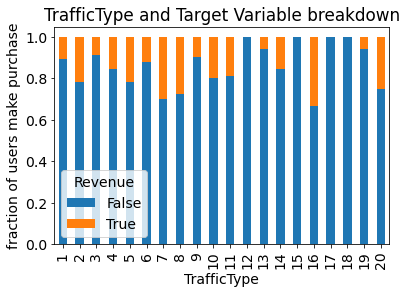

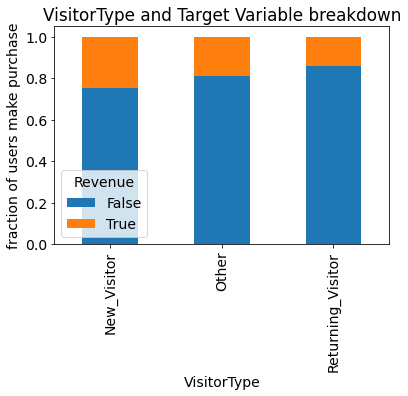

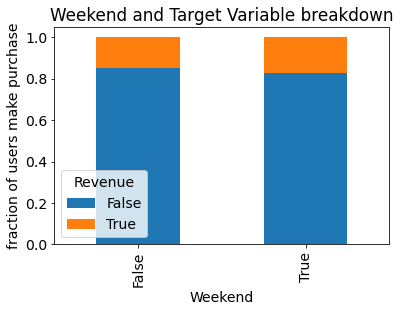

In [99]:
names = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
for name in names:
    count_matrix = df.groupby([name, 'Revenue']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.ylabel('fraction of users make purchase')
    plt.title(name + ' and Target Variable breakdown')
    plt.savefig('../figures/'+name+'_bar.png',dpi = 300)
    plt.show()

## Splitting Strategy

Since each rows represents a unique visit from an anonymous users, this dataset is iid. Hence, it does not have a group structure, and it is not a time series data.
Because only a small portion of the dataset has true in the revenue column, I will perform a Stratified K-Fold data split to ensure there are similar fraction of trues in target variable in the training, validation, and testing dataset. I will use the standard 60%, 20%, 20% data split.

In [3]:
y = df['Revenue'] # remember, we want to predict who earns more than 50k or less than 50k
X = df.loc[:, df.columns != 'Revenue']

In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
random_state = 10
    
# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',y_test.value_counts(normalize=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('train balance:')
    print(y_train.value_counts(normalize=True))
    print('val balance:')
    print(y_val.value_counts(normalize=True))

test balance: False    0.845093
True     0.154907
Name: Revenue, dtype: float64
train balance:
False    0.845228
True     0.154772
Name: Revenue, dtype: float64
val balance:
False    0.845499
True     0.154501
Name: Revenue, dtype: float64
train balance:
False    0.845228
True     0.154772
Name: Revenue, dtype: float64
val balance:
False    0.845499
True     0.154501
Name: Revenue, dtype: float64
train balance:
False    0.845364
True     0.154636
Name: Revenue, dtype: float64
val balance:
False    0.845093
True     0.154907
Name: Revenue, dtype: float64
train balance:
False    0.845364
True     0.154636
Name: Revenue, dtype: float64
val balance:
False    0.845093
True     0.154907
Name: Revenue, dtype: float64


## Data Preprocessing

From exploratory analysis, I find many numerical variables are heavily tailed or has a few extremely large values, so I will use Standard Scaler to transform the continuous variables. The SpecialDate variable although it is numerical, it represents the closeness of the purchase date to the special date, I will treat it as a categorical feature and use Ordinal Encoder to transform. I will transform the remaining categorical features using OneHotEncoder. The target variables are true and false, which does not need any transformation.

There are 17 features in the processed dataset. After preprocessing, the 17 predictor columns has expanded to 74 columns. 

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [42]:
ordinal_ftrs = ['SpecialDay'] 
ordinal_cats = [[0. , 0.2, 0.4, 0.6, 0.8, 1.]]
onehot_ftrs = ['Month',  'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend']
std_ftrs = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)



(7398, 17)
(7398, 74)


## Machine learning Pipeline

In order to train various classification models, I constructed a function called MLpipe_KFold_Accuracy to process the data and fit models. The inputs of this function include the feature dataset X, the target variable y, the preprocessor which preprocess the data, the machine learning algorithm to train, and the parameter grid for hyperparameter tuning. This function will loop through five random states to include the uncertainties introduced by training data variation through stratified cross validation. Under each random state, the data is first randomly split into training set and test set. Next, the training set is used in a four-split stratified cross validation. In each fold, the data go through the pipeline that first preprocess the data and then fit the input machine learning algorithm. Various combinations of hyperparameters are tested to determine which parameters give the best validation score. The selected model is used to fit the test set and the accuracy score is calculated. Lastly, the function returns the best models and test scores from the five random states.

I use accuracy score as the measurement for model performance because it is the most straight forward way. I will dig deeper into precision score, recall score, and f-score in the best performing model.


In [105]:
def MLpipe_KFold_Accuracy(X,y,preprocessor,ML_algo,param_grid):
   
    test_scores = []
    best_models = []
    
    # loop through 5 random states 
    random_states = [1,2,3,4,5]
    for random_state in random_states:
    
        print("----------- Iteration",random_state,"-----------")
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
        
        pipe = make_pipeline(preprocessor,ML_algo)
        
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=False)
        
        grid.fit(X_other, y_other)
        
        results = pd.DataFrame(grid.cv_results_)
       
        
        # find which hyperparameter combination gives the best validation score 
        print('best model parameters:',grid.best_params_)
        print('validation score:', grid.best_score_)
        
        # calculate the test score 
        y_test_pred = grid.predict(X_test)
        test_score = accuracy_score(y_test,y_test_pred)
        print('test score:',test_score)
        
        # append the test score and the best model to the lists 
        test_scores.append(test_score)
        best_models.append(grid.best_params_)
        
        
    return best_models, test_scores

### Logistic Regression 

In logistic regressions, I trained models with different penalty parameter separately. I set the solver as saga and the max iteration is 2000. When penalty is ‘l1’, the model is lasso regression. When penalty is ‘ls’, the model is ridge regression. When penalty is ‘none’, the model is logistic regression without any penalties. Under each type, I tuned the parameter C between 1/log(-2) and 1/log(2). For elastic net, in addition to parameter C, I tuned the parameter l1 ratio between 0 and 1.

In each iteration, the best parameter varies. This is no single value that stand out among the models, the hyperparameter really depends on the training data.


In [8]:
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

ML_algo = lm.LogisticRegression()

param_grid = {
               'logisticregression__penalty' : ['none'],
               'logisticregression__C' : 1/np.logspace(-2,2,21),
               'logisticregression__solver' : ['saga'],
               'logisticregression__max_iter': [5000]
             }
    
lr_models, lr_scores = MLpipe_KFold_Accuracy(X,y,preprocessor,ML_algo,param_grid)

----------- Iteration 1 -----------


C:\Users\wendy\anaconda3\envs\data1030\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


best model parameters: {'logisticregression__C': 100.0, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'saga'}
validation score: 0.8828061638280617
test score: 0.8901054339010543
----------- Iteration 2 -----------


C:\Users\wendy\anaconda3\envs\data1030\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


best model parameters: {'logisticregression__C': 100.0, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'saga'}
validation score: 0.8849351175993512
test score: 0.8799675587996756
----------- Iteration 3 -----------


C:\Users\wendy\anaconda3\envs\data1030\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


best model parameters: {'logisticregression__C': 100.0, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'saga'}
validation score: 0.8858475263584753
test score: 0.8759124087591241
----------- Iteration 4 -----------


C:\Users\wendy\anaconda3\envs\data1030\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


best model parameters: {'logisticregression__C': 100.0, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'saga'}
validation score: 0.8847323600973236
test score: 0.8848337388483374
----------- Iteration 5 -----------


C:\Users\wendy\anaconda3\envs\data1030\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


best model parameters: {'logisticregression__C': 100.0, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'saga'}
validation score: 0.8826034063260341
test score: 0.8884833738848338


### Lasso Regression 

In [9]:
ML_algo = lm.LogisticRegression()

param_grid = {
               'logisticregression__penalty' : ['l1'],
               'logisticregression__C' : 1/np.logspace(-2,2,21),
               'logisticregression__solver' : ['saga'],
               'logisticregression__max_iter': [5000]
             }
    
lasso_models, lasso_scores = MLpipe_KFold_Accuracy(X,y,preprocessor,ML_algo,param_grid)

----------- Iteration 1 -----------
best model parameters: {'logisticregression__C': 0.0630957344480193, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
validation score: 0.8846309813463098
test score: 0.8856447688564477
----------- Iteration 2 -----------
best model parameters: {'logisticregression__C': 1.0, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
validation score: 0.8852392538523925
test score: 0.8799675587996756
----------- Iteration 3 -----------
best model parameters: {'logisticregression__C': 2.5118864315095797, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
validation score: 0.8862530413625305
test score: 0.8771289537712895
----------- Iteration 4 -----------
best model parameters: {'logisticregression__C': 1.0, 'logisticregression__max_iter': 5000, 'logisticregression__penalty'

### Ridge Regression 

In [10]:
ML_algo = lm.LogisticRegression()

param_grid = {
               'logisticregression__penalty' : ['l2'],
               'logisticregression__C' : 1/np.logspace(-2,2,21),
               'logisticregression__solver' : ['saga'],
               'logisticregression__max_iter': [5000]
             }
    
ridge_models, ridge_scores = MLpipe_KFold_Accuracy(X,y,preprocessor,ML_algo,param_grid)

----------- Iteration 1 -----------
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
validation score: 0.8834144363341444
test score: 0.8888888888888888
----------- Iteration 2 -----------
best model parameters: {'logisticregression__C': 15.848931924611133, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
validation score: 0.8852392538523925
test score: 0.8803730738037308
----------- Iteration 3 -----------
best model parameters: {'logisticregression__C': 15.848931924611133, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
validation score: 0.8861516626115167
test score: 0.8759124087591241
----------- Iteration 4 -----------
best model parameters: {'logisticregression__C': 0.25118864315095796, 'logisticregression__max_iter': 5000, 'logisticregr

### Elastic Net

In [11]:
from sklearn.linear_model import LogisticRegression

ML_algo = LogisticRegression()

param_grid = {
               'logisticregression__penalty' : ['elasticnet'],
               'logisticregression__C' : 1/np.logspace(-2,2,10),
               'logisticregression__l1_ratio': np.linspace(0,1,10),
               'logisticregression__solver' : ['saga'],
               'logisticregression__max_iter': [2000]
             }
    
el_models, el_scores = MLpipe_KFold_Accuracy(X,y,preprocessor,ML_algo,param_grid)

----------- Iteration 1 -----------
best model parameters: {'logisticregression__C': 0.07742636826811278, 'logisticregression__l1_ratio': 1.0, 'logisticregression__max_iter': 2000, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}
validation score: 0.884124087591241
test score: 0.8856447688564477
----------- Iteration 2 -----------
best model parameters: {'logisticregression__C': 0.21544346900318845, 'logisticregression__l1_ratio': 0.2222222222222222, 'logisticregression__max_iter': 2000, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}
validation score: 0.8855433901054339
test score: 0.8803730738037308
----------- Iteration 3 -----------


C:\Users\wendy\anaconda3\envs\data1030\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best model parameters: {'logisticregression__C': 35.938136638046274, 'logisticregression__l1_ratio': 0.0, 'logisticregression__max_iter': 2000, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}
validation score: 0.8861516626115167
test score: 0.8759124087591241
----------- Iteration 4 -----------
best model parameters: {'logisticregression__C': 0.5994842503189408, 'logisticregression__l1_ratio': 0.5555555555555556, 'logisticregression__max_iter': 2000, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}
validation score: 0.8854420113544201
test score: 0.8844282238442822
----------- Iteration 5 -----------
best model parameters: {'logisticregression__C': 0.07742636826811278, 'logisticregression__l1_ratio': 1.0, 'logisticregression__max_iter': 2000, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}
validation score: 0.8842254663422546
test score: 0.8901054339010543


### Random Forest

In random forest, I tuned the max depth and max features parameters. I tried 1, 3, 10, 30, and 100 for max depth and 0.5, 0.75, and 1.0 for max features. In four out of five models, the model performs the best when the max depth equals to 10, and all the models performs the best when max features equals to 0.5.

In [118]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

ML_algo = RandomForestClassifier(random_state=random_state)
param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5,0.75,1.0] # linearly spaced between 0.5 and 1
              } 

rf_models, rf_scores = MLpipe_KFold_Accuracy(X,y,preprocessor,ML_algo,param_grid)

----------- Iteration 1 -----------
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.9000405515004055
test score: 0.9115977291159773
----------- Iteration 2 -----------
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.9047039740470397
test score: 0.897404703974047
----------- Iteration 3 -----------
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.9073398215733983
test score: 0.897404703974047
----------- Iteration 4 -----------
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.9053122465531225
test score: 0.9010543390105434
----------- Iteration 5 -----------
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}


### SVC

In support vector classifier, I tuned two parameters: C and gamma. I tuned C in range 1e-03 to 1e04, and gamma in the same range. Three out of five models performs the best when C equals to 1.0 and gamma equals to 0.1, and the other two performs the best when gamma equals to 0.01. The parameter tuning depends on the input data as well. 

In [15]:
from sklearn.svm import SVC

ML_algo = SVC()
param_grid = {'svc__C': np.logspace(-3,4,num=8),
             'svc__gamma':np.logspace(-3,4,num=8)}

models_svc, scores_svc = MLpipe_KFold_Accuracy(X,y,preprocessor,ML_algo,param_grid)

----------- Iteration 1 -----------
best model parameters: {'svc__C': 10.0, 'svc__gamma': 0.01}
validation score: 0.8928426601784266
test score: 0.8965936739659367
----------- Iteration 2 -----------
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
validation score: 0.8950729927007299
test score: 0.8925385239253852
----------- Iteration 3 -----------
best model parameters: {'svc__C': 100.0, 'svc__gamma': 0.01}
validation score: 0.8954785077047851
test score: 0.8848337388483374
----------- Iteration 4 -----------
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
validation score: 0.8961881589618816
test score: 0.8884833738848338
----------- Iteration 5 -----------
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
validation score: 0.8935523114355232
test score: 0.8978102189781022


### K-Nearest Neighbors

For k-nearest neighbors classifier, I tuned three parameters: number of neighbors, leaf size, and weight methods. For number of neighbors, I used 5, 10, 15, 20, and 25. For leaf size, I used 10, 30, and 50. I tried two weight methods: uniform and distance. The results are pretty uniform, all five models perform the best when leaf size is 10 and the weight method is uniform. The number of neighbors depend on the training dataset. Two models prefer 15 neighbors, two models prefer 10 neighbors, and one prefers 25 neighbors.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

ML_algo = KNeighborsClassifier()
param_grid = {'kneighborsclassifier__n_neighbors': [5,10,15,20,25],
             'kneighborsclassifier__leaf_size': [10, 30, 50],
             'kneighborsclassifier__weights': ['uniform', 'distance']}

models_knn, scores_knn = MLpipe_KFold_Accuracy(X,y,preprocessor,ML_algo,param_grid)

----------- Iteration 1 -----------
best model parameters: {'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.877838605028386
test score: 0.8815896188158961
----------- Iteration 2 -----------
best model parameters: {'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.8810827250608273
test score: 0.8722627737226277
----------- Iteration 3 -----------
best model parameters: {'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.8791565287915653
test score: 0.8678021086780211
----------- Iteration 4 -----------
best model parameters: {'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__n_neighbors': 25, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.8796634225466342
test score: 0.8742903487

## Results

The table below summaries the accuracy scores from various machine learning algorithms. The baseline model has the accuracy score of 0.8453. All models have improved the accuracy scores. Random Forest has the best average test accuracy score of 0.9027. 

In [110]:
baseline_score = 1-sum(y)/y.shape[0]
baseline_score

0.8452554744525548

In [119]:
print("Logistic Regression: ",np.mean(lr_scores))
print("Lasso Regression: ",np.mean(lasso_scores))
print("Ridge Regression: ",np.mean(ridge_scores))
print("Elastic Net: ",np.mean(el_scores))
print("Random Forest: ",np.mean(rf_scores))
print("SVC: ",np.mean(scores_svc))
print("KNN: ",np.mean(scores_knn))

Logistic Regression:  0.8838605028386052
Lasso Regression:  0.8834549878345499
Ridge Regression:  0.8836982968369831
Elastic Net:  0.8832927818329278
Random Forest:  0.9033252230332522
SVC:  0.8920519059205191
KNN:  0.8746958637469586


In [121]:
(np.mean(rf_scores) - baseline_score)/np.std(rf_scores)

9.73811730253106

In [122]:
np.std(rf_scores)

0.005963139154793751

In [120]:
np.mean(rf_scores)

0.9033252230332522

The standard deviation of random forest accuracy score is 0.00563, which makes the prediction score 10.32 standard deviations above the baseline model. 

### Random Forest

In [116]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
test_scores = []
best_models = []
recall_scores = []
precision_scores = []
f05_scores = []
f1_scores = []
f2_scores = []


ML_algo = RandomForestClassifier(random_state=random_state)
param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5,0.75,1.0] # linearly spaced between 0.5 and 1
              } 

# loop through 5 random states 
random_states = [1,2,3,4,5]
for random_state in random_states:

    print("----------- Iteration",random_state,"-----------")
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
    
    pipe = make_pipeline(preprocessor,ML_algo)

    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                    cv=kf, return_train_score = True, n_jobs=-1, verbose=False)

    grid.fit(X_other, y_other)

    # for each combination, calculate the train and validation scores using the evaluation metric
    results = pd.DataFrame(grid.cv_results_)
   # print(results[['param_alpha','mean_test_score','mean_train_score']]) 

    # find which hyperparameter combination gives the best validation score 
    print('best model parameters:',grid.best_params_)
    print('validation score:', grid.best_score_)

    # calculate the test score 
    y_test_pred = grid.predict(X_test)
    test_score = accuracy_score(y_test,y_test_pred)

    # append the test score and the best model to the lists 
    test_scores.append(test_score)
    best_models.append(grid.best_params_)
    recall_scores.append(recall_score(y_test,y_test_pred))
    precision_scores.append(precision_score(y_test,y_test_pred))
    f05_scores.append(fbeta_score(y_test,y_test_pred,0.5))
    f1_scores.append(fbeta_score(y_test,y_test_pred,1))
    f2_scores.append(fbeta_score(y_test,y_test_pred,2))

----------- Iteration 1 -----------
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.9000405515004055
----------- Iteration 2 -----------


Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
Pass beta=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
Pass beta=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error


best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.9047039740470397
----------- Iteration 3 -----------


Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
Pass beta=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
Pass beta=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error


best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.9073398215733983
----------- Iteration 4 -----------


Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
Pass beta=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
Pass beta=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error


best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.9053122465531225
----------- Iteration 5 -----------


Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
Pass beta=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
Pass beta=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error


best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.9029805352798054


Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
Pass beta=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
Pass beta=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error


In [117]:
print("Accuracy Score: ", np.mean(test_scores))
print("Recall Score: ", np.mean(recall_scores))
print("Precision Score: ", np.mean(precision_scores))
print("F Score (beta = 0.5): ", np.mean(f05_scores))
print("F Score (beta = 1) ", np.mean(f1_scores ))
print("F Score (beta = 2): ", np.mean(f2_scores ))

Accuracy Score:  0.9033252230332522
Recall Score:  0.5968586387434555
Precision Score:  0.7299945694483465
F Score (beta = 0.5):  0.6986960543716033
F Score (beta = 1)  0.6565894746977785
F Score (beta = 2):  0.6193696614231069


Out of all predicted users visits who will make a purchase, 72.54% are actually made a purchase. Out of all user visits with a purchase made, 60.26% are correctly predicted. From the higher precision score, we can tell that the model produces more false positives than false negatives, indicating there are more user visits without a purchase made are predicted as with purchase than visits with purchases made but are predicted as a normal visit. 

### Feature Importance

In [53]:
def ML_pipeline_kfold(X,y,preprocessor,ML_algo, param_grid, random_state):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y ,random_state = random_state)
    # splitter for _other
    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
    
    # create the pipeline: preprocessor + supervised ML method
    pipe = make_pipeline(preprocessor,ML_algo)

    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy', 
                         cv=kf, return_train_score = True, n_jobs=-1, verbose=False)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
 
        
    return grid, X_test, y_test

In [67]:
ftr_names = X.columns
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])


ML_algo = RandomForestClassifier()
param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5,0.75,1.0] # linearly spaced between 0.5 and 1
              } 

#rf_models, rf_scores = MLpipe_KFold_Accuracy(X,y,preprocessor,ML_algo,param_grid,"Random Forest")
grid, X_test, y_test = ML_pipeline_kfold(X,y,preprocessor,ML_algo, param_grid, 42 )

test_score = grid.score(X_test,y_test)
print('test score = ', test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    #print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.9006488240064883
test baseline =  0.8450932684509327


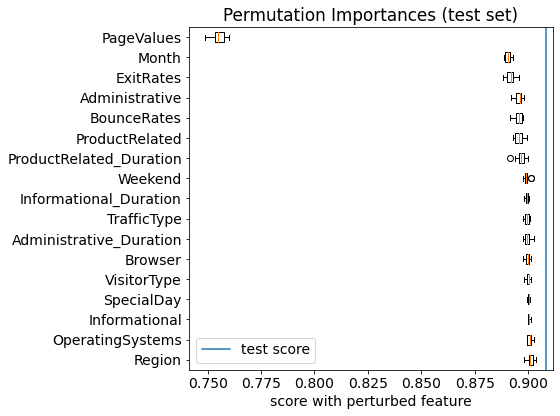

In [100]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/permutation_importances.png',dpi = 300)
plt.show()

most important feature: feature 72 , score  0.5265603520125449


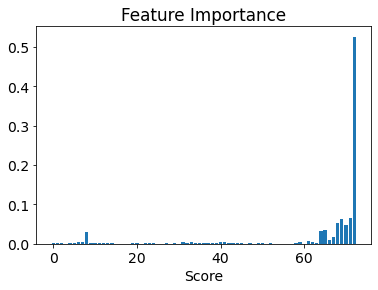

In [101]:
importance = grid.best_estimator_._final_estimator.feature_importances_
print("most important feature: feature",np.argmax(importance),", score ",np.max(importance))
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.xlabel('Feature')
plt.xlabel('Score')
plt.savefig('../figures/rf_feature_importance.png',dpi = 300)
plt.show()

In [91]:
importance.argsort()[-3:][::-1]

array([72, 71, 69], dtype=int64)

In [102]:
 print("Important Features:",'ProductRelated_Duration', 'ExitRates', 'PageValues')

Important Features: ProductRelated_Duration ExitRates PageValues


From permutation test, the three most important features are PageValues, Month, and ExitRates. From random forest, the top three most important features are PageValues, ExitRates, and Product Related Duration. Page values are the average value for a web page that a user visited before completing an e-commerce transaction. Product Related Duration measures the total time spent a user spend on product related webpages. It makes sense because users tend to browse many products before completing a purchase. It is surprising that Month is the second most important variable, whereas Weekend is a not very important variable.

These features provide guidance for the company’s marketing strategy to increase number of visits with a purchase. The company can polish product related pages to increase the purchase rate. Because month is also an importance factor, the company can increase promotion in certain months to attract more customers.


## Outlook

Although the accuracy score seems to be high, due to the high baseline score, the precision and recall scores still have room for improvement.  A model I did not cover in this project is the XGBoost, which is a more advanced tree-based model. I also did not come up with any new features. I could do some feature engineering which might boost the accuracy rate. Training some of these models take a long time. If we could find a more efficient way for building models, online stores can develop a real-time online shopper behavior analysis system to monitor user activities.

## Reference

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).